### Seaborn library

- Matplotlib을 기반으로 다양한 색상의 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다.
- 기본적으로 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다
- 보다 간단한 조작으로 다양한 색상 테마 및 차트를 사용

- sns.lineplot() : 시간 변화에 따른 값의 변화 및 흐름을 시각화
    - sns.lineplot(x, y, data)
        - x : 사용할 x축 데이터
        - y : 사용할 y축 데이터
        - data : 사용할 전체 데이터(data 인자값 전달 시 x, y 인자값으로는 키워드 문자열 전달)
- sns.distplot() : 히스토그램 및 커널밀도추정치(확률밀도함수의 일종)를 한 번에 시각화
    - sns.distplot(x, hist, kde)
        - x : 사용할 데이터
        - hist : 히스토그램 설정 여부, 기본값 = True
        - kde : 확률밀도함수 설정 여부, 기본값 = True
- sns.boxplot() : 각 속성 별로 box-plot 시각화
    - sns.boxplot(x, y, data, by)
        - x : 사용할 x축 데이터
        - y : 사용할 y축 데이터
        - data : 사용할 전체 데이터(data 인자값 전달 시 x, y 인자값으로는 키워드 문자열 전달)
        - by : group_by 기준
- sns.countplot() : 각 카테고리 별로 데이터 개수를 시각화
    - sns.countplot(x, data)
        - x : 카테고리로 사용될 데이터프레임의 열이름
        - data : 사용할 데이터프레임
- sns.barplot() : 카테고리별 수치를 시각화, 값에 대한 비교 용이
    - sns.barplot(x, y, data)
        - x : 사용할 x축 데이터
        - y : 사용할 y축 데이터
        - data : 사용할 전체 데이터(data 인자값 전달 시 x, y 인자값으로는 키워드 문자열 전달)
- sns.pairplot() : 데이터프레임을 인수로 받아 열의 조합에 대해 스캐터 플롯을 그리고 대각선 영역에는 해당 데이터의 히스토그램 시각화
    - sns.pairplot(data)
- sns.heatmap() : 카테고리 값으로 구성된 2차원 데이터에 대한 시각화
    - sns.heatmap(data, annot, fmt)
        - data : 사용할 데이터프레임
        - annot : 값 표기 여부
        - fmt : 값 표기 형식

In [3]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 데이터 처리 관련 Pandas function

- Series.map(func) : Series 객체에 대해 사용자정의함수 적용
- Series/DataFrame.apply(func) : Series/DataFrame 객체에 대해 사용자정의함수 적용

In [4]:
# map with dict()
# 5행짜리 과일 이름으로 이루어진 Series
s1 = pd.Series(['apple', 'banana', 'apple', 'orange', 'kiwi'])
s1

0     apple
1    banana
2     apple
3    orange
4      kiwi
dtype: object

In [6]:
# mapping 정보를 담고 있는 딕셔너리 생성
set(s1.values)
dict_map = {'apple':0, 'banana':1, 'kiwi':2, 'orange':3}
dict_map

{'apple': 0, 'banana': 1, 'kiwi': 2, 'orange': 3}

In [7]:
# .map(교환기준)은 딕셔너리 자료를 넣어주면 키값에 매칭된 벨류값으로 교환
s1_2 = s1.map(dict_map)
s1_2

0    0
1    1
2    0
3    3
4    2
dtype: int64

In [8]:
# map에 람다함수를 이용할 수 있음
s1.map(lambda x : len(x))

0    5
1    6
2    5
3    6
4    4
dtype: int64

In [15]:
# apply 활용하기
s2 = pd.Series([1, 2, 3, 4, 5])
s2.apply(np.sqrt)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
dtype: float64

In [19]:
# 4 x 2 구조에서 모든 값이 1인 데이터프레임 생성
d1 = pd.DataFrame(np.ones((4,2)))
d1

,0,1
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0


In [20]:
# 내장함수 적용
d1.sum()

0    4.0
1    4.0
dtype: float64

In [21]:
# apply 역시 내부 요소에 함수를 이용한 연산을 진행함
d1.apply(sum)

0    4.0
1    4.0
dtype: float64

In [22]:
# axis = 1 -> 같은 행에 있는 자료끼리 합산
d1.apply(sum, axis=1)

0    2.0
1    2.0
2    2.0
3    2.0
dtype: float64

In [23]:
# 사각형의 가로, 세로 길이를 저장하고 있는 데이터프레임 생성
# 컬럼 : height, width
# 로우 : 3개
data={'height':[10, 20, 30],
     'width':[3, 4, 5]}
df = pd.DataFrame(data)
df

,height,width
0,10,3
1,20,4
2,30,5


In [24]:
# 사각형의 면적을 구해주는 사용자함수 정의
def area(row):
    return row['height'] * row['width']

In [25]:
rec = {'height':100, 'width':24}
area(rec)

2400

In [28]:
# apply함수에서 axis=1일때 사용자 정의 함수가 접근하는 대상 : 한 행(로우)
df.apply(area, axis=1)

0     30
1     80
2    150
dtype: int64

In [29]:
# 함수 적용 결과를 새로운 컬럼으로 저장
# 'area' 라는 컬럼을 만들어 거기에 함수의 결과물을 저장
df['area'] = df.apply(area, axis=1)
# df['area'] = df['height'] * df['width']
df

,height,width,area
0,10,3,30
1,20,4,80
2,30,5,150


### 데이터 변환하기

In [30]:
# 배열 타입의 데이터를 데이터프레임으로 변환하여 최종 데이터로 생성하기
from sklearn.datasets import load_iris # 배열 타입 데이터
# sns.load_iris() : 완성된 df 형태의 데이터
# 1. iris = load_iris()
# 2. data, target값을 분리해서 변수로 할당하되 target은 2차원 데이터로 생성(150행 1열)
# 3. numpy 함수를 이용하여 data, target을 열 방향으로 합치기
# 4. 3번 데이터를 이용하여 DataFrame 생성, 컬럼이름도 동시에 생성
# 5. 품종(species)은 문자타입으로 최종 변환(0=setosa, 1=versicolor, 2=virginica)
# 5번에서 map 혹은 apply 사용
# 6. 컬럼명 변경 : (cm) 제거, 공백 제거

In [31]:
# 1. 사이킷런의 iris 데이터 받아와 확인하기
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [34]:
# data, target값을 분리해서 변수로 할당하되, target값은 2차원 데이터로 생성(150 * 1로 reshape)
x = iris['data'] # 문제
y = iris['target'].reshape(150, 1) # 답

In [35]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [42]:
# 3. numpy 함수를 이용하여 data, target을 열 방향으로 합치기
# x에 y를 붙여주기 => np.hstack()
data = np.hstack((x, y))
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [43]:
data.shape

(150, 5)

In [90]:
# 4. 3번 데이터를 이용하여 DataFrame 생성, 컬럼이름도 iris의 'feature_name' 를 참고해 만들어주세요.
# 마지막 컬럼의 이름은 'species' 입니다.
df = pd.DataFrame(data, columns=['sepal length (cm)', 'sepal width (cm)', 
                                'petal length (cm)', 'petal width (cm)', 'species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [91]:
# 5. 품종(species)는 문자타입으로 최종변환(0 => setosa, 1 => versicolor, 2 => verginica)
# map이나 apply 를 이용해서 species컬럼 내부 값을 붓꽃 이름으로 변경해주세요.
map_dict = {0:'setosa', 1:'versicolor', 2:'verginica'}
df['species'] = df['species'].map(map_dict)

In [92]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,verginica
146,6.3,2.5,5.0,1.9,verginica
147,6.5,3.0,5.2,2.0,verginica
148,6.2,3.4,5.4,2.3,verginica


In [86]:
def get_species(row):
    if row['species'] == 0:
        return 'setosa'
    elif row['species'] == 1:
        return 'versicolor'
    elif row['species'] == 2:
        return 'verginica'

In [ ]:
# df['species'] = df['species'].map(get_species, axis=1)

In [95]:
# 컬럼명 변경 : (cm) 제거, 공백 제거
# 남은 띄어쓰기는 _로 교체
# df.columns를 이용해 반복문 처리해 (cm)와 공백을 replace로 바꿔주세요.
for col in df.columns:
    new_col = col.replace(" (cm)", " ")
    new_col = new_col.replace(' ', "_")
    df.rename({col:new_col}, axis=1, inplace=True)

In [97]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 데이터 탐색하기

In [98]:
# 수치형 변수의 기술통계값 확인
# df.decribe() : 기본동작 => 수치형 변수에 대한 통계를 보여줍니다.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [99]:
# 수치데이터가 아닌 컬럼에 대한 기술통계값 확인
df.describe(include=['object'])

,species
count,150
unique,3
top,setosa
freq,50


In [100]:
# 모든 변수(컬럼)의 기술통계값을 확인하기
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [104]:
# 샘플데이터로 사용될 데이터 추출
# 품종 컬럼을 제외한 모든 컬럼에 대해 1행 데이터만 추출
sample = df.iloc[[0], 0:4]
sample

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


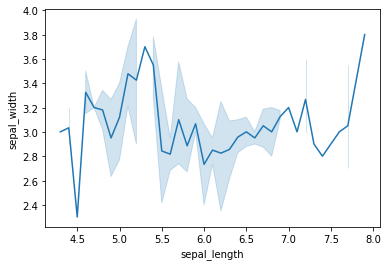

In [106]:
# line plot
# sns.lineplot(x=x축데이터, y=y축데이터, data=사용할데이터셋)
sns.lineplot(x='sepal_length', y='sepal_width', data=df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


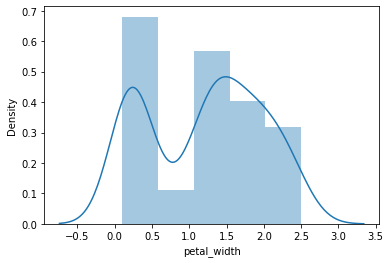

In [107]:
# distplot
# petal_width 값에 대한 히스토그램과 확률밀도함수
sns.distplot(df['petal_width'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


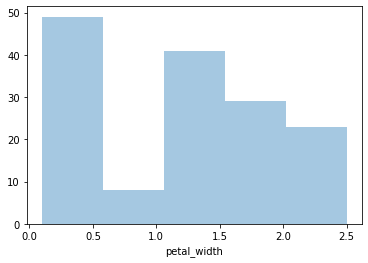

In [108]:
# 확률밀도함수 제외하고 히스토그램만 보여주기
# kde=False
sns.distplot(df['petal_width'], kde=False)
plt.show()

In [118]:
# 조건색인으로 setosa 종의 데이터만 남긴 뒤 제일 위쪽 5개 로우만 출력해보세요.
df[df['species']=='setosa'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_width', ylabel='Density'>

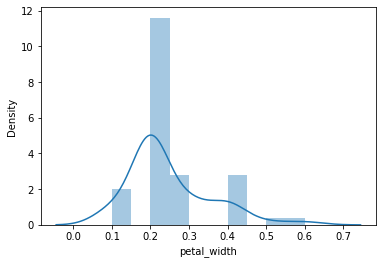

In [134]:
# 조건색인을 이용해서
# distplot을 setasa종에 대한 petal_width로 출력해보세요
sns.distplot(df[df['species']=='setosa']['petal_width'])